# seaborn

### 목차

#### - 1. barplot()

#### - 2. countplot()

#### - 3. stripplot() / swarmplot()

#### - 4. boxplot() / violinplot()

#### - 5. hitmap()

#### matplotlib과의 차이점?
   - 작동 방식은 비슷하나 통계기반의 plot을 좀 더 쉽게 그릴수 있도록 도와준다
   - 개인적으로 `matplotlib`보다 `seaborn`이 더 활용하기 편한거 같슴다

In [1]:
# warning 제거 옵션

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [43]:
# 한글폰트 깨짐
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 깨짐
mpl.rcParams['axes.unicode_minus'] = False

In [24]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


## 1. barplot
   - 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 차트

In [5]:
# 실습용 데이터 불러오기
iris     = sns.load_dataset('iris')
titanic  = sns.load_dataset('titanic')
tips     = sns.load_dataset('tips')
flights  = sns.load_dataset('flights')

### sns.set_style()
   - 스타일 테마 설정 : 아래 옵션을 이용해서 plot의 배경을 지정할 수 있다.
       - 1. darkgrid
       - 2. whitegrid
       - 3. dark
       - 4. white
       - 5. ticks

##### titanic 데이터를 이용하여 seaborn을 사용해 봅시다

In [6]:
# titanic 데이터를 이용하여 seaborn을 사용해 봅시다
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


- 그래프1 : 그냥 barplot 그리기
- 그래프2 ; hue옵션 적용한 그래프
- 그래프3 : 그래프2에 dodge옵션을 적용한 그래프

Text(0.5, 1.0, 'dodge도 해봤어요~')

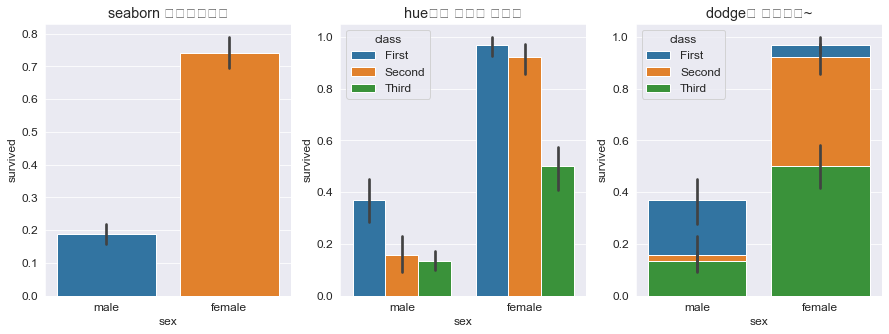

In [44]:
# barplot

# 스타일 테마를 설정
sns.set_style('darkgrid')

# 그래프 객체를 생성하기 위한 figure객체 얻어오기
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 3, 1)
area02 = fig.add_subplot(1, 3, 2)
area03 = fig.add_subplot(1, 3, 3)


# 그래프 1 : 성별에 따른 생존률
sns.barplot(x='sex', 
            y='survived', 
            data=titanic, 
            ax=area01) 
area01.set_title('seaborn 처음그려봐요')



# 그래프 2 : 그래프 1에 hue옵션 적용
sns.barplot(x='sex', 
            y='survived', 
            data=titanic, 
            ax=area02,
            hue='class')  # 막대그래프를 좀 더 세분화하여 그려줌
area02.set_title('hue옵션 적용해 봤어요')



# 그래프 3 : 그래프 2에 dodge옵션 적용
sns.barplot(x='sex', 
            y='survived', 
            data=titanic, 
            ax=area03,
            hue='class', 
            dodge=False)  # hue옵션으로 세분화한 막대를 누적으로 그릴지, 나누어서 그릴지 선택하는 옵션
area03.set_title('dodge도 해봤어요~')




##### tips데이터를 사용해 봅시다
   - 요일별 전체 팁을 시각화

In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='tip'>

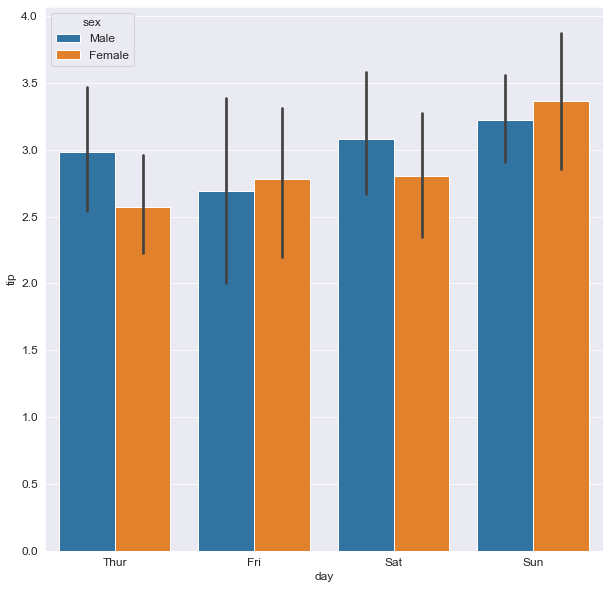

In [10]:
sns.barplot(x     = 'day', 
            y     = 'tip', 
            data  = tips,
            hue   = 'sex',
            dodge = True)

## 2. countplot
   - 카테고리 값 별로 데이터 빈도를 표시하는 차트

 - 그래프1 : 그냥 countplot()
 - 그래프2 : countplot()에 hue옵션 적용
 - 그래프3 : 그래프2에 dodge옵션도 적용

Text(0.5, 1.0, 'dodge도 해봤어요~')

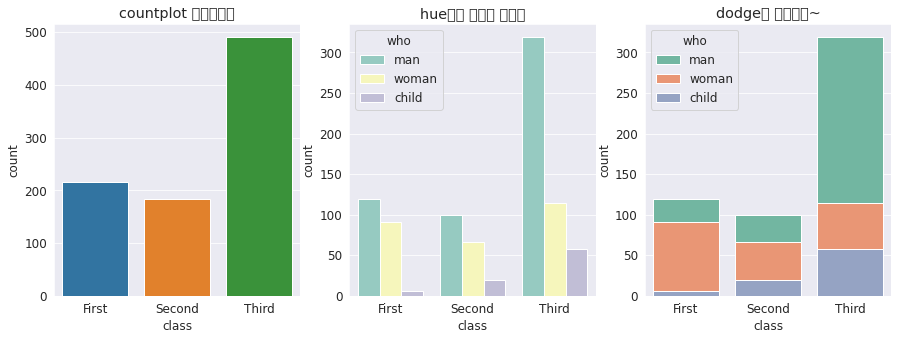

In [42]:

plt.rcParams['font.family'] = 'NanumGothic'
# 그래프 객체를 생성하기 위한 figure객체 얻어오기
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1, 3, 1)
area02 = fig.add_subplot(1, 3, 2)
area03 = fig.add_subplot(1, 3, 3)


# 그래프 1 : countplot 그려봅시다
sns.countplot(x     = 'class', 
              data  = titanic, 
              ax    = area01) 
area01.set_title('countplot 그려봅시다')



# 그래프 2 : 그래프 1에 hue옵션 적용해봐요
sns.countplot(x       = 'class', 
              data    = titanic, 
              ax      = area02,
              palette = 'Set3', # 색깔도 한번 바꿔봤씀다 ㅎ
              hue     = 'who')  # 막대그래프를 좀 더 세분화하여 그려줌
area02.set_title('hue옵션 적용해 봤어요')



# 그래프 3 : 그래프 2에 dodge옵션 적용
sns.countplot(x       = 'class', 
              data    = titanic, 
              ax      = area03,
              hue     = 'who',
              palette = 'Set2',
              dodge   = False)  # hue옵션으로 세분화한 막대를 누적으로 그릴지, 나누어서 그릴지 선택하는 옵션
area03.set_title('dodge도 해봤어요~')



##### tips를 이용한 countplot()을 그려봅시다
   - 요일별로 팁을 준 빈도를 시각화 하면?
  

Text(0.5, 1.0, '요일별 흡연자/비흡연자의 tip')

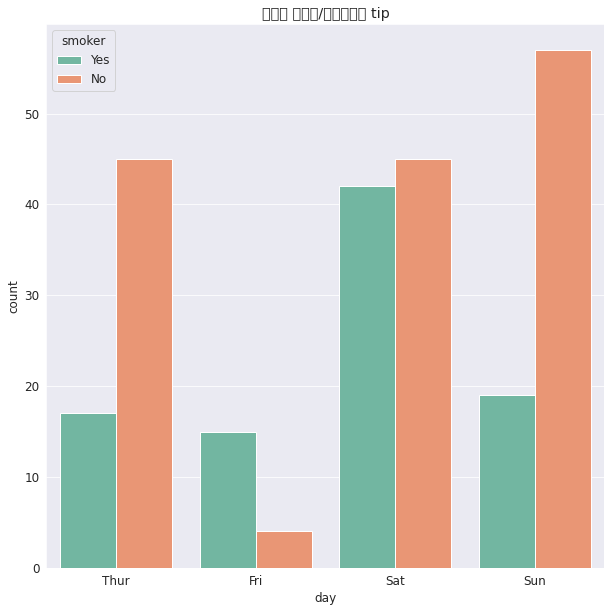

In [41]:
sns.countplot(x        = 'day',
              data     = tips,
              palette  = 'Set2',
              hue      = 'smoker')
plt.title('요일별 흡연자/비흡연자의 tip')

## 3. stripplot() / swarmplot()
   - scatter plot 처럼 모든 데이터를 점으로 시각화
   - 이것 또한 유용하게 쓰일거 같아요
   - swarmplot이 strippolot에 비해 수치변화에 따른 분포도를 좀 더 잘 볼수 있다

<AxesSubplot:xlabel='day', ylabel='total_bill'>

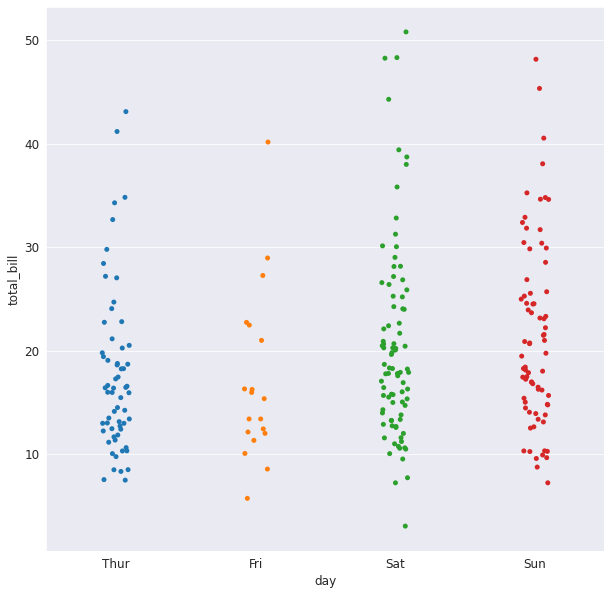

In [39]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

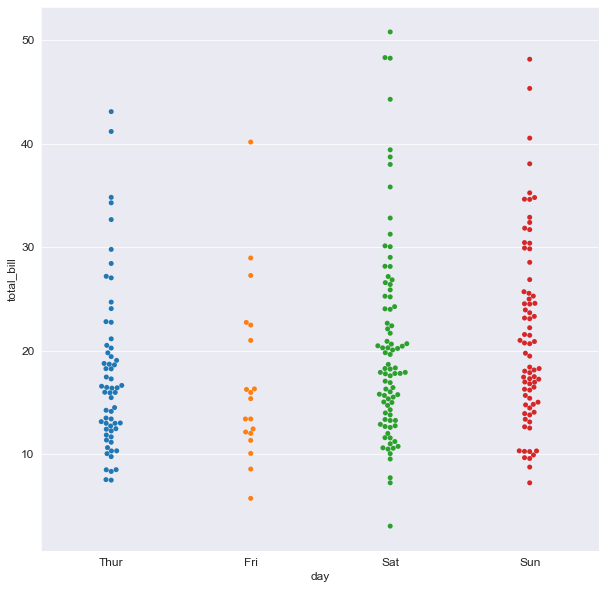

In [62]:
sns.swarmplot(x='day', y='total_bill', data=tips)

##### 문제
 - 서브플롯을 2개의 영역으로 만들고
 - 타이타닉 데이터를 이용하여
 - class 별 나이의 분포를 확인하라.

In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [57]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='pclass', ylabel='age'>

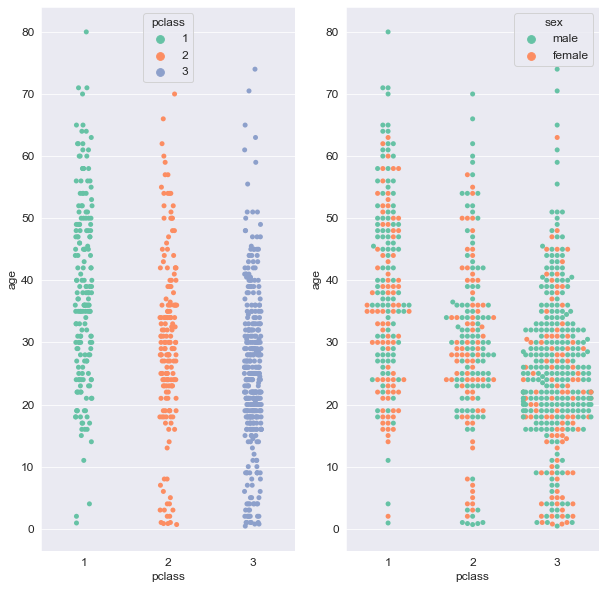

In [70]:
fig, axes = plt.subplots(1, 2)

sns.stripplot(x       = 'pclass',
              y       = 'age',
              data    = titanic,
              palette = 'Set2',
              ax      = axes[0],
              hue     = 'pclass')

sns.swarmplot(x       = 'pclass',
              y       = 'age',
              data    = titanic,
              palette = 'Set2',
              ax      = axes[1],
              hue     = 'sex')


# 이제 파이썬으로 그래프그리는거
# 느낌오기 시작했쥬?

## 4. boxplot() / violinplot()

<AxesSubplot:title={'center':'violin plot'}, xlabel='alive', ylabel='age'>

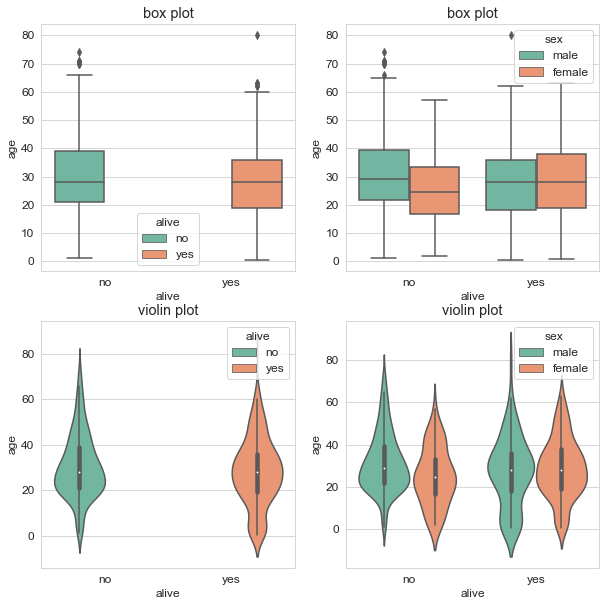

In [88]:
# 그래프 배경 지정
sns.set_style('whitegrid')

# 2행 2열의 subplot 만들기
fig, axes = plt.subplots(2, 2)

# 각각의 subplot에 제목지정
axes[0, 0].set_title('box plot')
axes[0, 1].set_title('box plot')
axes[1, 0].set_title('violin plot')
axes[1, 1].set_title('violin plot')

# boxplot
sns.boxplot(x       = 'alive',
            y       = 'age',
            data    = titanic,
            palette = 'Set2',
            ax      = axes[0, 0],
            hue     = 'alive')


sns.boxplot(x       = 'alive',
            y       = 'age',
            data    = titanic,
            palette = 'Set2',
            hue     = 'sex',
            ax      = axes[0, 1])


# violinplot
sns.violinplot(x       = 'alive',
               y       = 'age',
               data    = titanic,
               palette = 'Set2',
               ax      = axes[1, 0],
               hue     = 'alive')


sns.violinplot(x       = 'alive',
               y       = 'age',
               data    = titanic,
               palette = 'Set2',
               hue     = 'sex',
               ax      = axes[1, 1])

# 문제
   - tips 데이터에서 요일별, 성별, 전체 팁을 stripplot()을 사용하여 시각화 하라

In [89]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


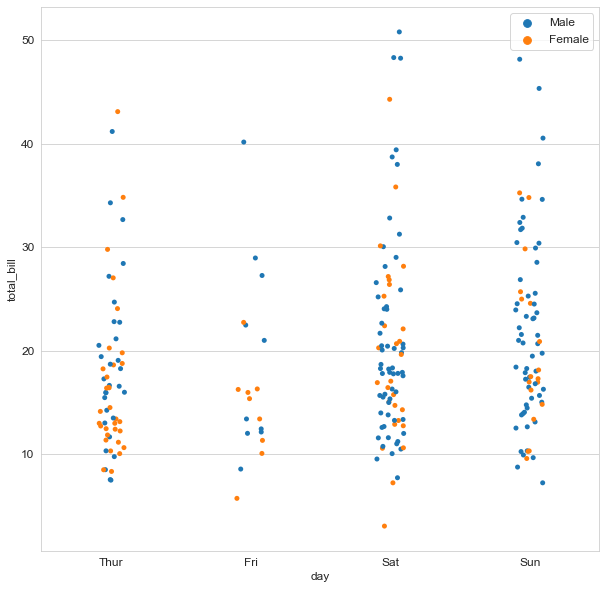

In [95]:
sns.stripplot(x       = 'day', 
              y       = 'total_bill', 
              hue     = 'sex', 
              data    = tips,
              jitter  = True)

plt.legend(loc=0)

## 5. hitmap()
   - 하나 이상의 카테고리 값의 변화를 색깔 변화로 시각화하는 차트
   - 보통 빈도의 변화를 색의 변화로 나타내기 때문에, 사용하는 데이터프레임은 행과 열의 속성의 횟수를 센 데이터프레임을 사용한다.
   - 보통 pivot 테이블 형식의 데이터를 사용한다.

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:xlabel='pclass', ylabel='sex'>

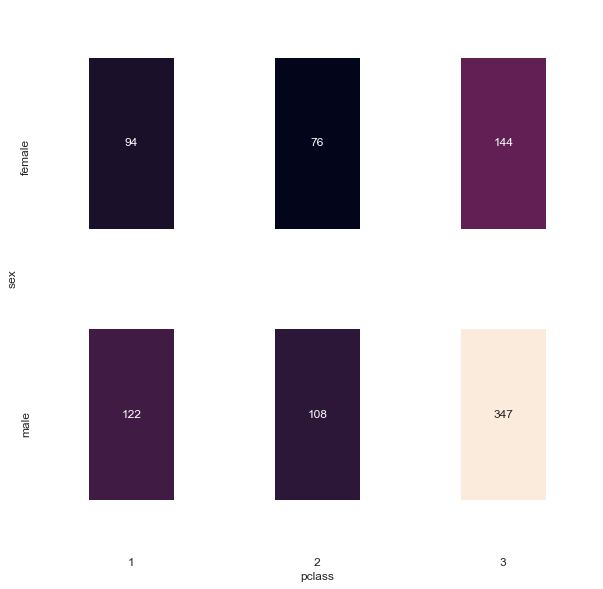

In [112]:
# titanic
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
# 인덱스 성별, 열 클래스

table = titanic.pivot_table(index='sex', columns='pclass', aggfunc='size')
display(table)

sns.heatmap(table, annot=True, fmt='d', cbar=False, linewidth=100)

<AxesSubplot:xlabel='year', ylabel='month'>

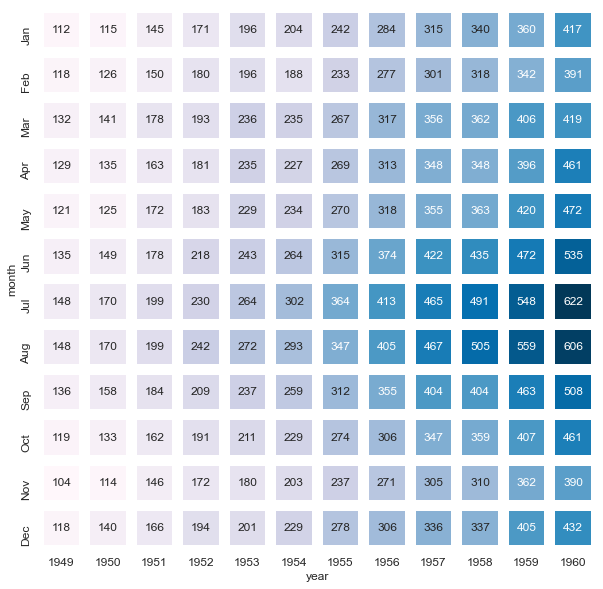

In [126]:
# flights 데이터
# x축을 연도
# y축을 월로 지정하여
# heatmap을 그려보세요

pivot_df = flights.pivot_table('passengers', index='month', columns='year', aggfunc='sum')

colormap = plt.cm.PuBu # 색지정
sns.heatmap(pivot_df, annot=True, fmt='d', cbar=False, cmap=colormap, linewidth=10)